#  Shortest Route Selection

In [1]:
import osmnx as ox, geopandas as gpd, networkx as nx
import sys
%matplotlib inline
import matplotlib.pyplot as plt

ox.config(log_file=True, log_console=True, use_cache=True)

In [2]:
# create a network around some (lat, lon) point but do not simplify it yet
location_point = (9.011897, 38.738177)
G = ox.graph_from_point(location_point, network_type='all', distance=1500, simplify=False)

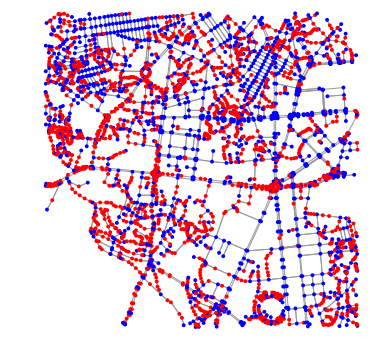

In [3]:
# turn off strict mode and see what nodes we'd remove, in red
nc = ['b' if ox.is_endpoint(G, node) else 'r' for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc, node_zorder=3)

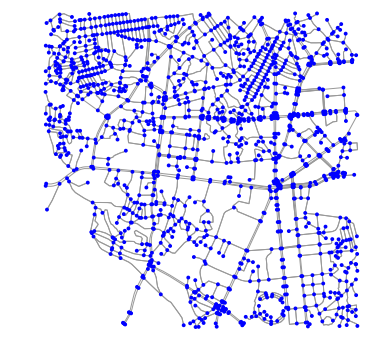

In [4]:
# simplify the network(line geometries are simplified into start and end coordinates)
G = ox.simplify_graph(G)
fig, ax = ox.plot_graph(G, node_color='b', node_zorder=3)

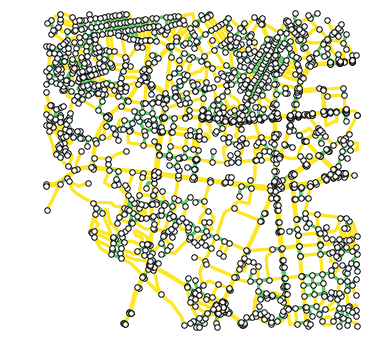

In [5]:
# show the simplified network with edges colored by edge length
ec = ox.get_edge_colors_by_attr(G, attr='length')
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

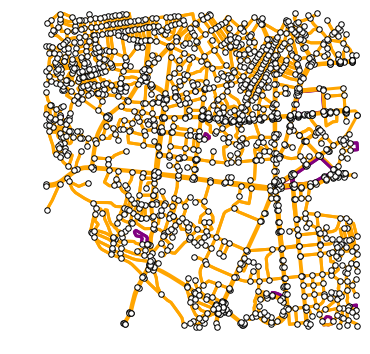

In [6]:
# highlight all parallel edges in purple
ec = ['orange' if key == 0 else 'purple' for u, v, key in G.edges(keys=True)]
fig, ax = ox.plot_graph(G, node_color='w', node_edgecolor='k', node_size=30, 
                           node_zorder=3, edge_color=ec, edge_linewidth=3)

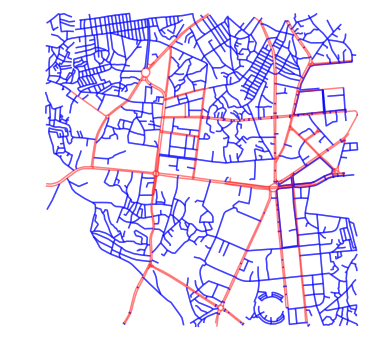

In [7]:
# highlight all the one-way edges in the mission district network from earlier
ec = ['r' if data['oneway'] else 'b' for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.5)

In [8]:
# save street network as ESRI shapefile to work with in GIS
ox.save_graph_shapefile(G, filename='network-shapeAA1500_2')

In [9]:
# define origin/desination points then get the nodes nearest to each
#coordinates1 = input(x, y)

#X = coordinates1[0]
#Y = coordinates1[1]
#A = (X, Y)
#coordinates2 = input()
#X1 = coordinates2[0]
#Y1 = coordinates2[1]

#B = (X1, Y1)
X1 = float(input("Insert Origin Longitude =: "))    
Y1 = float(input("Insert Origin Latitude =: "))
X2 = float(input("Insert Destination Longitude =: "))    
Y2 = float(input("Insert Destination Latitude =: "))
# if user input is Address
#def geo(location):
    #g = geocoders.Nominatim() #I use Nominatim, there are many others
    #loc = g.geocode(location)
    #return loc.latitude, loc.longitude
#print(geo('Tacoma, Washington'))''''''''

origin_point = (Y1, X1)
destination_point = (Y2, X2)
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)
origin_node, destination_node

Insert Origin Longitude =: 38.724627
Insert Origin Latitude =: 9.024598
Insert Destination Longitude =: 38.742046
Insert Destination Latitude =: 8.999201


(262937836, 2041885478)

In [10]:
# find the shortest path between origin and destination nodes
route = nx.shortest_path(G, origin_node, destination_node, weight='length')
str(route)

'[262937836, 563255298, 563255321, 563255305, 563255307, 563255303, 306371169, 2224995859, 306371172, 533590766, 563255462, 5158599494, 563255457, 306371259, 306371260, 563255433, 563255434, 563255439, 563255438, 535936428, 306371228, 535936424, 306371227, 306371229, 29706792, 864703200, 864703221, 864703210, 2062725175, 864703189, 5247312719, 5247312928, 3848008982, 5247312945, 4879009808, 4879009809, 5247312934, 5166871122, 3848008978, 4879009810, 5166871123, 4879009811, 5247312944, 3848008976, 3848008973, 3848008971, 3883555832, 3848008961, 3883555829, 3848008960, 1752631444, 469626677, 469626743, 469626740, 469626725, 469626726, 2052777141, 469626731, 2052777126, 2052777118, 469626720, 2052777092, 469626712, 484578820, 803910822, 48613317, 795627864, 533590363, 2041885553, 2041885487, 2090643867, 2041885478]'

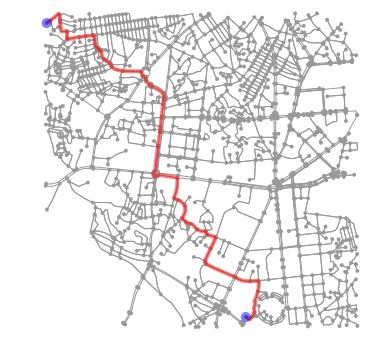

In [11]:
# plot the route showing origin/destination lat-long points in blue
fig, ax = ox.plot_graph_route(G, route, origin_point=origin_point, destination_point=destination_point)

In [12]:
#how long is our route in meters?
Total_Distance = nx.shortest_path_length(G, origin_node, destination_node, weight='length')

In [13]:
#how long is our route in time?
Time_taken = nx.shortest_path_length(G, origin_node, destination_node, weight='drive-time')

In [46]:
# save street network as ESRI shapefile to work with in GIS
#ox.save_graph_shapefile(G, filename='network-shape3')

In [14]:
print ("Total travel distance is", Total_Distance, "meters")
print ("Travel time is", Time_taken, "minutes?")

Total travel distance is 4947.23844699655 meters
Travel time is 55 minutes?


In [ ]:
""""def inputs(input_type):
    inputs = (coordinates, address)
    coordinates = float(input("insert coordinates"))
    address = str(input("insert address"))
    #coordinates = input(X, Y)
    X = coordinates[0]
    Y = coordinates[1]
    X1 = float(input("Insert Origin Longitude =: "))    
    Y1 = float(input("Insert Origin Latitude =: "))
    X2 = float(input("Insert Destination Longitude =: "))    
    Y2 = float(input("Insert Destination Latitude =: "))
    #coordinates = (X1, X2, Y1, Y2)
    
    
    if coordinates:
        origin_point = (Y1, X1)
        destination_point = (Y2, X2)
        origin_node = ox.get_nearest_node(G, origin_point)
        destination_node = ox.get_nearest_node(G, destination_point)
        origin_node, destination_node
        route = nx.shortest_path(G, origin_node, destination_node, weight='length')
        str(route)
    elif inputs.address:
        address = (origin_address, destination_address)
        origin_address = input("Input Origin Address =: ")
        origin_address = str(origin_address)
        destination_address = input("Destination Address =: ")
        destination_address = str(destination_address)
    #else